In [90]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('bmh')

In [91]:
df = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [92]:
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [93]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [95]:
# convert column "a" of a DataFrame
df["Close"] = df["Close"].str.replace(',', '').astype(float)


In [96]:
df["Volume"] = df["Volume"].str.replace(',', '').astype(float)

In [97]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [98]:
df.shape

(1258, 5)

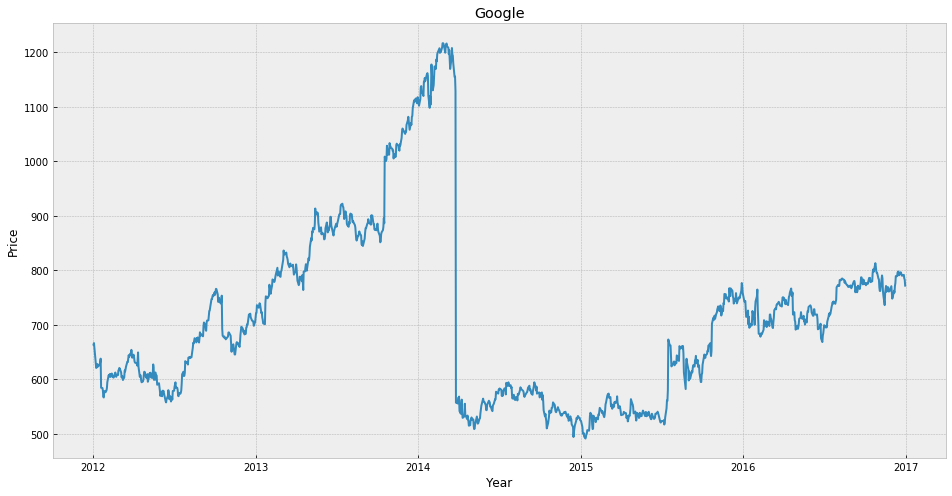

In [99]:
#Visualization Of Close Price Data
plt.figure(figsize=(16,8))
plt.title("Google")
plt.xlabel("Year")
plt.ylabel("Price")
plt.plot(df["Close"])
plt.show()

In [100]:
#Get only Close Prices
df = df[['Close']]
df.head()

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76


In [101]:
#Create a variable to predict 'x' days out into future
future_days = 25
#Cretate new column (target) shifted 'x' units/days up
df["prediction"] = df[['Close']].shift(-future_days)
df.head()

,Close,prediction
Date,,
2012-01-03,663.59,608.18
2012-01-04,666.45,609.79
2012-01-05,657.21,604.25
2012-01-06,648.24,610.52
2012-01-09,620.76,608.09


In [102]:
#Create the feature dataset (X) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['prediction'], 1))[:-future_days]
print(X)

[[663.59]
 [666.45]
 [657.21]
 ...
 [769.2 ]
 [768.27]
 [760.99]]


In [103]:
#Create the target dataset (y) and convert it to a numpy array and get all of the target values except the last 'x' rows
y = np.array(df['prediction'])[:-future_days]
print(y)

[608.18 609.79 604.25 ... 785.05 782.79 771.82]


In [104]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [105]:
#Create the models
#Create Decision Tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [106]:
#Get last 'x' rows for feature dataset
x_future = df.drop(["prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[796.97],
       [799.37],
       [813.11],
       [807.67],
       [799.07],
       [795.35],
       [795.37],
       [784.54],
       [783.61],
       [768.7 ],
       [762.13],
       [762.02],
       [782.52],
       [790.51],
       [785.31],
       [762.56],
       [754.02],
       [736.08],
       [758.49],
       [764.48],
       [771.23],
       [760.54],
       [769.2 ],
       [768.27],
       [760.99]])

In [107]:
#Show the model Tree Prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction, "\n")

#Show the model Linear Regression Prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[761.68 768.24 770.84 822.31 747.92 750.5  750.5  759.11 771.19 776.42
 789.29 789.27 796.1  797.07 808.09 801.5  794.2  796.42 794.56 791.26
 780.35 791.55 785.05 782.79 771.82] 

[782.67404462 784.57454501 795.45490971 791.14710884 784.33698246
 781.39120686 781.40704437 772.83103638 772.09459248 760.28773384
 755.08511404 754.99800777 771.23144856 777.55853109 773.44078025
 755.42562036 748.66300649 734.45676612 752.20268846 756.94602067
 762.291178   753.82603254 760.68367142 759.94722752 754.18237636]


C:\Users\91937\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


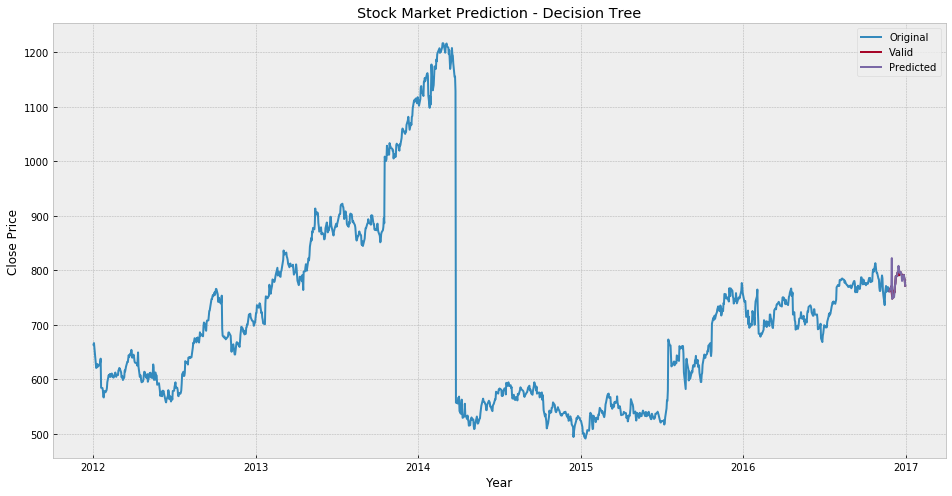

In [108]:
#Visualization of Models
#Decision Tree

predictions = tree_prediction

valid = df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Stock Market Prediction - Decision Tree')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(["Original", "Valid", "Predicted"])
plt.show()

C:\Users\91937\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


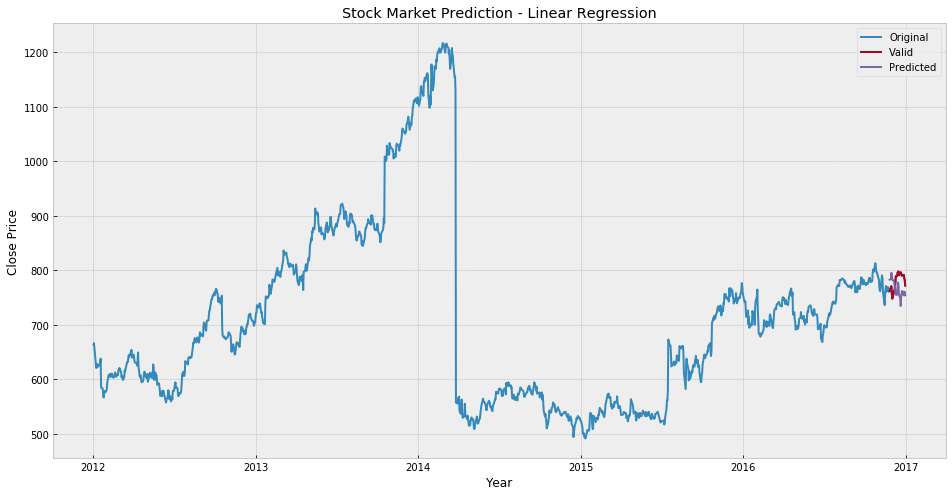

In [109]:
#Visualization of Models
#Linear Regression

predictions = lr_prediction

valid = df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Stock Market Prediction - Linear Regression')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(["Original", "Valid", "Predicted"])
plt.show()